<a href="https://colab.research.google.com/github/BryanSouza91/COVID-19/blob/master/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is only the tested and reported cases John Hopkins CCSE has data for this is by no means a definitive view of the global epidemic.

##### The repo is updated daily around 5:00pm PDT

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
confirmed_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

recovered_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

deaths_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [0]:
conf_df = pd.read_csv(confirmed_url) # ,index_col=['Province/State', 'Country/Region', 'Lat', 'Long']) 

recv_df = pd.read_csv(recovered_url) # ,index_col=['Province/State', 'Country/Region', 'Lat', 'Long'])

death_df = pd.read_csv(deaths_url) # ,index_col=['Province/State', 'Country/Region', 'Lat', 'Long'])

In [0]:
latest = conf_df.columns[-1]
latest

'4/5/20'

In [0]:
# create a differenced series function

def difference(dataset, interval=1):
    return pd.Series([dataset[i] - dataset[i - interval] for i in range(interval, len(dataset))])


# Plots total confirmed cases by country

##### Changing the logx=False to True shows the logarithmic scales of x-axis
##### Changing the logy=False to True shows the logarithmic scales of y-axis
##### Changing the loglog=False to True shows the logarithmic scales of both axes

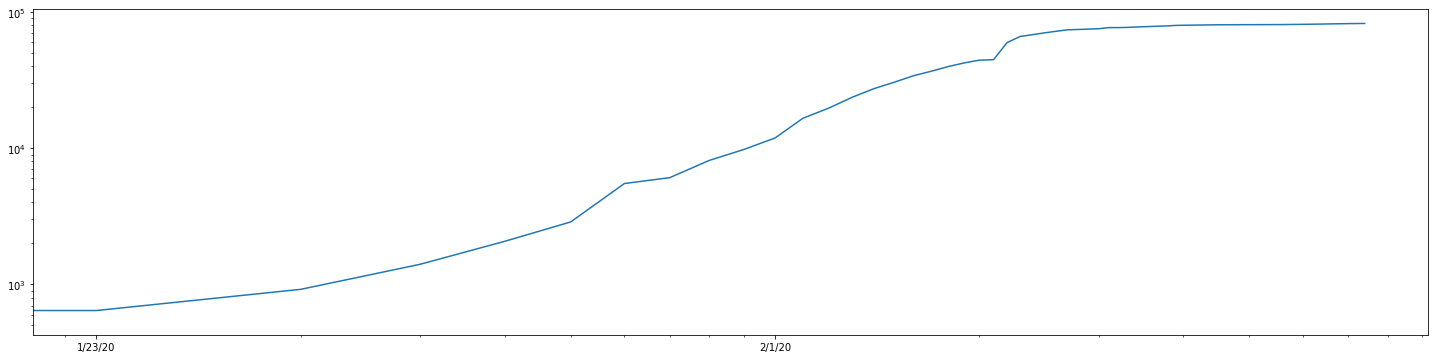

In [0]:
conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == 'China'].sum().plot(figsize=(25,6),logx=False,logy=False,loglog=True);

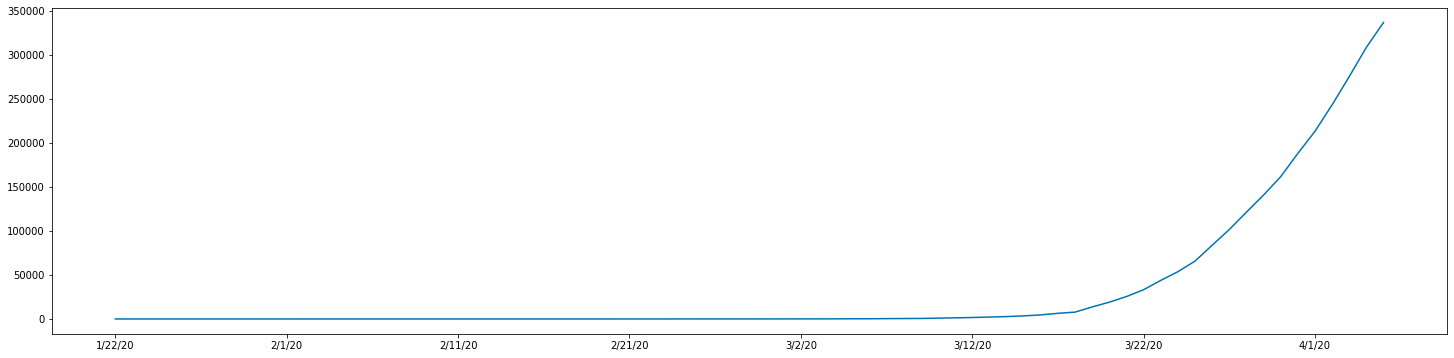

In [0]:
conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == 'US'].sum().plot(figsize=(25,6),logx=False,logy=False,loglog=False);

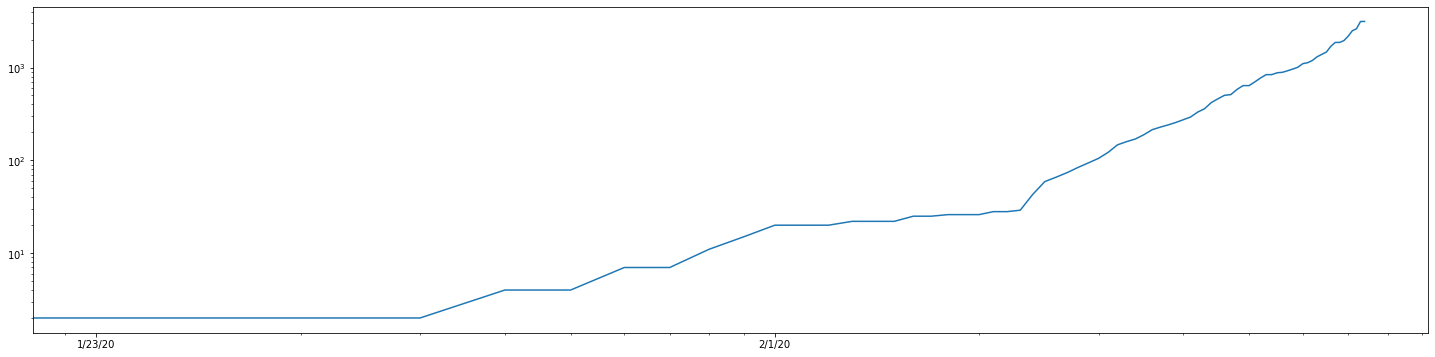

In [0]:
conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == 'Japan'].sum().plot(figsize=(25,6),logx=False,logy=False,loglog=True);

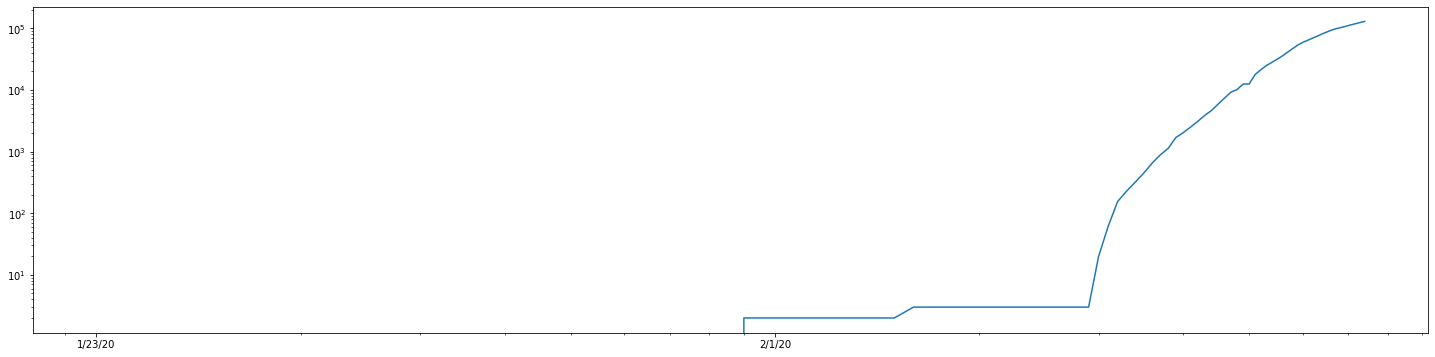

In [0]:
conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == 'Italy'].sum().plot(figsize=(25,6),logx=False,logy=False,loglog=True);

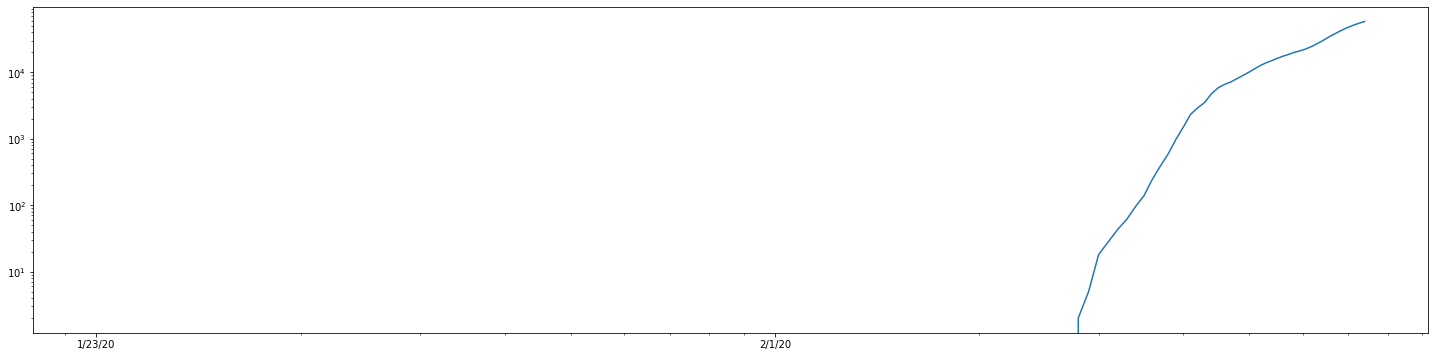

In [0]:
conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == 'Iran'].sum().plot(figsize=(25,6),logx=False,logy=False,loglog=True);

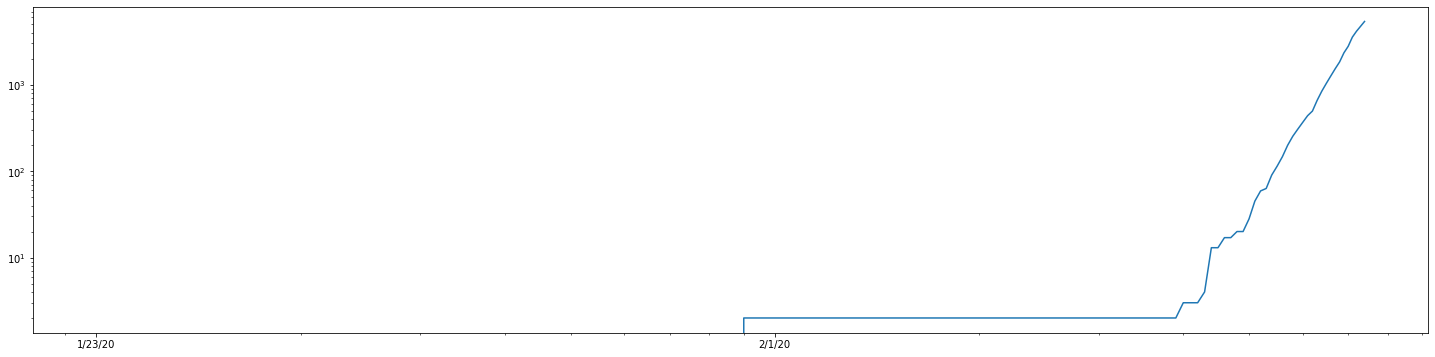

In [0]:
conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == 'Russia'].sum().plot(figsize=(25,6),logx=False,logy=False,loglog=True);

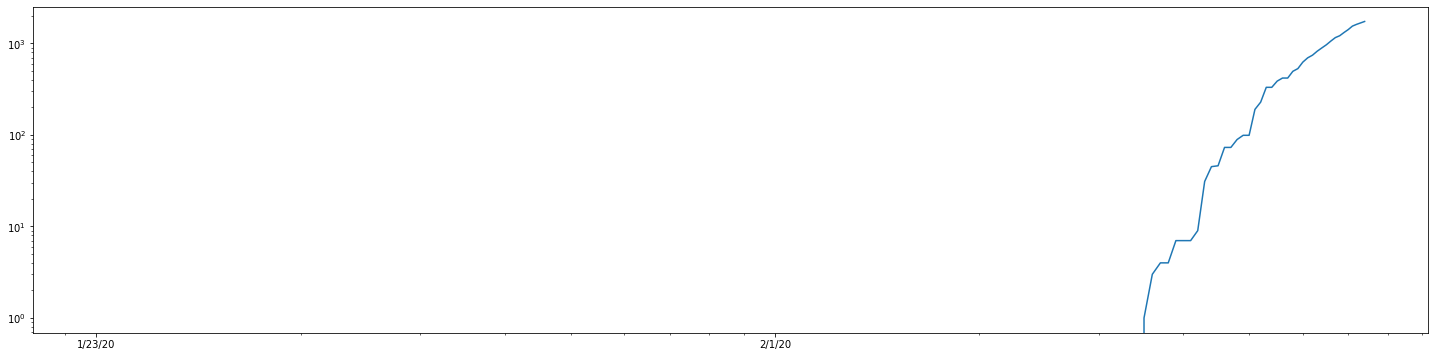

In [0]:
conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == 'Greece'].sum().plot(figsize=(25,6),logx=False,logy=False,loglog=True);

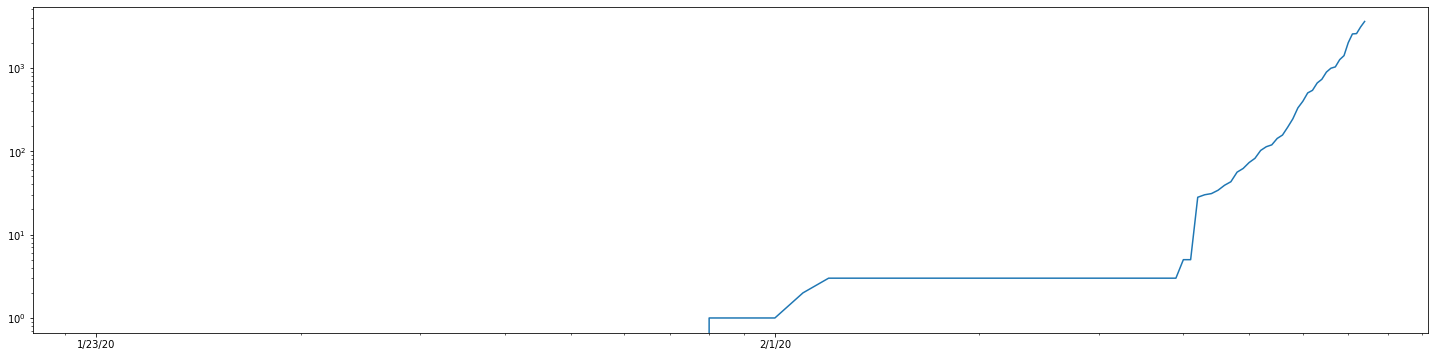

In [0]:
conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == 'India'].sum().plot(figsize=(25,6),logx=False,logy=False,loglog=True);

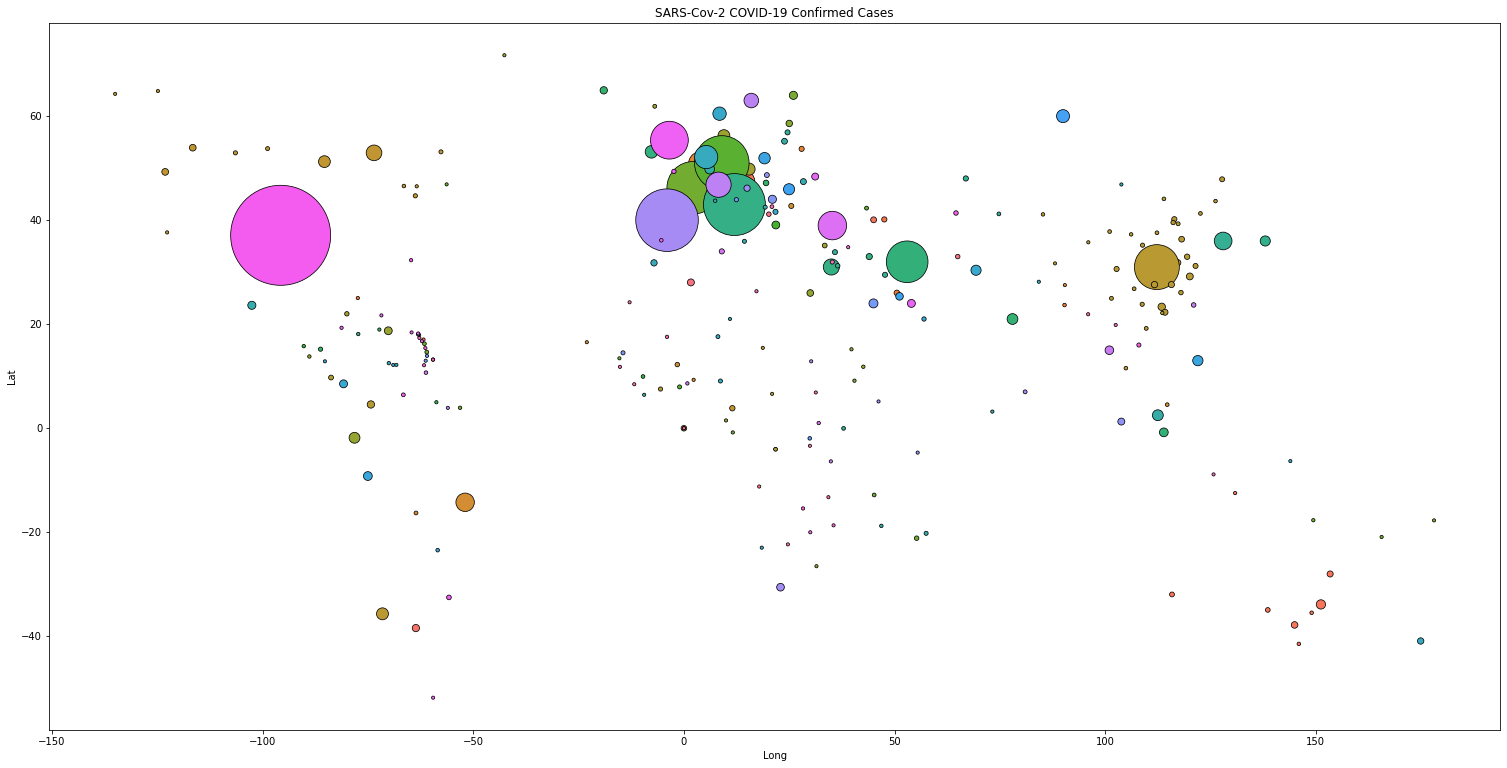

In [0]:
plt.figure(figsize=(26,13))
plt.title("SARS-Cov-2 COVID-19 Confirmed Cases")
sns.set_palette('colorblind')
sns.scatterplot(x='Long',y='Lat',size=latest,hue='Country/Region',data=conf_df,sizes=(10,10000),legend=False,edgecolor='k');

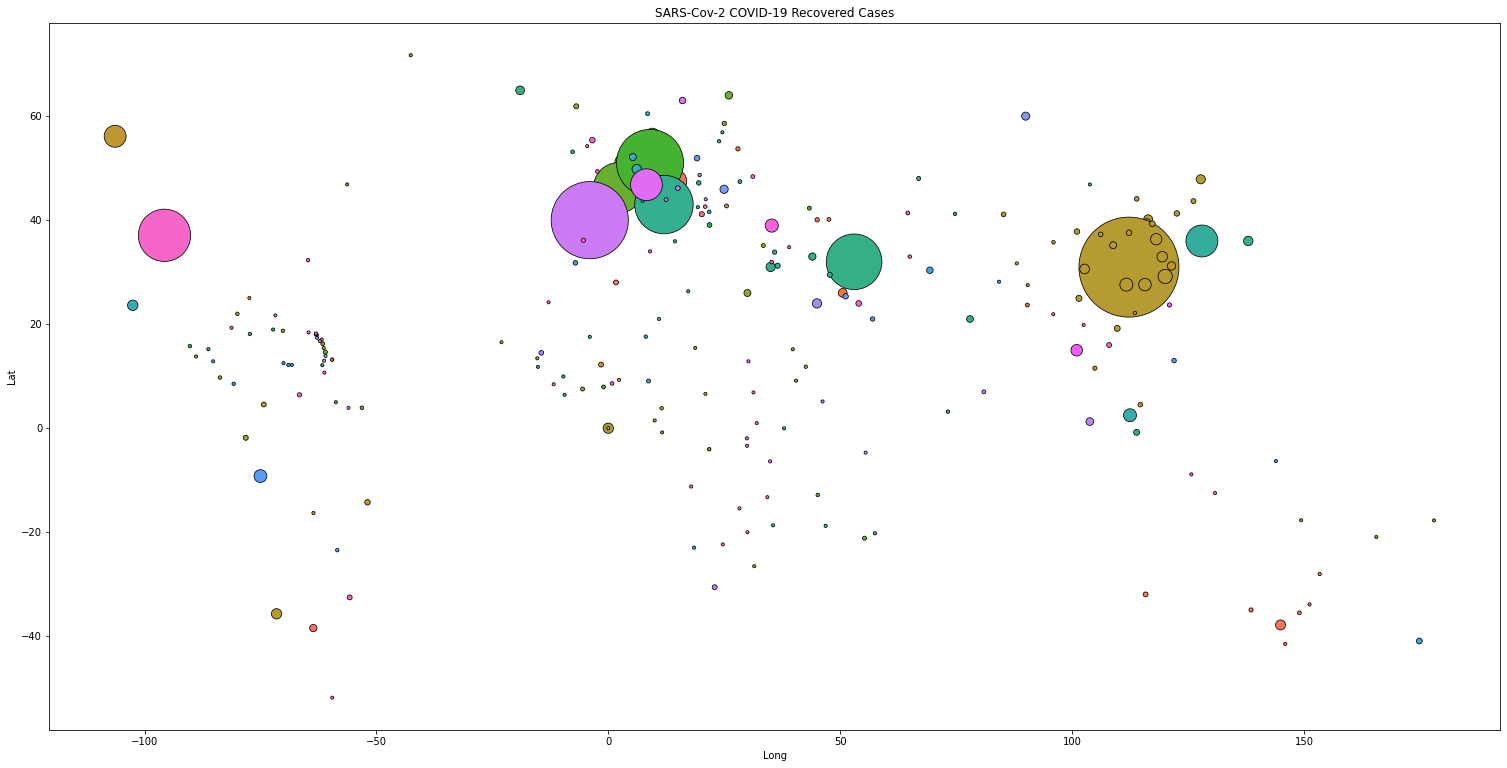

In [0]:
plt.figure(figsize=(26,13))
plt.title("SARS-Cov-2 COVID-19 Recovered Cases")
sns.set_palette('colorblind')
sns.scatterplot(x='Long',y='Lat',size=latest,hue='Country/Region',data=recv_df,sizes=(10,10000),legend=False,edgecolor='k');

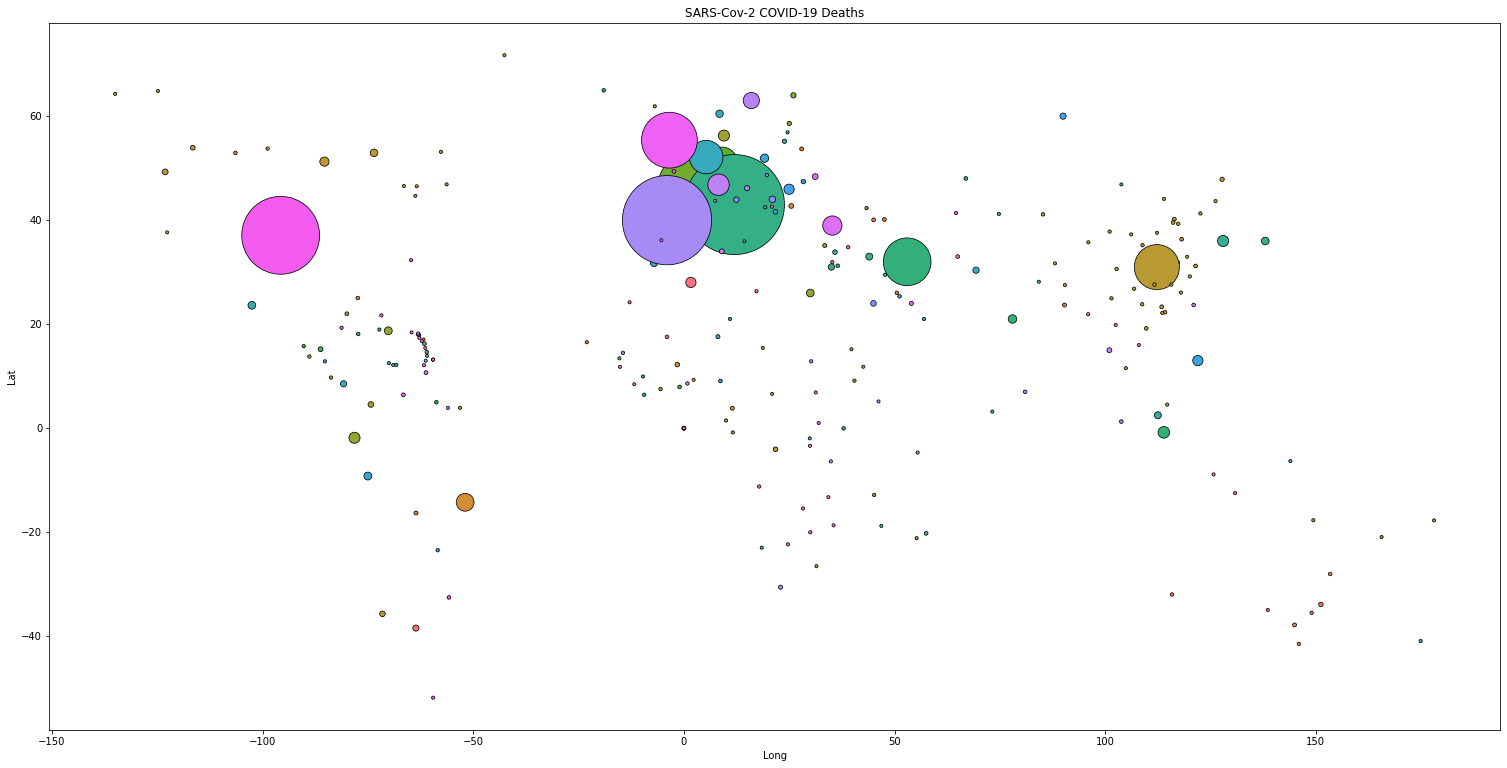

In [0]:
plt.figure(figsize=(26,13))
plt.title("SARS-Cov-2 COVID-19 Deaths")
sns.set_palette('colorblind')
sns.scatterplot(x='Long',y='Lat',size=latest,hue='Country/Region',data=death_df,sizes=(10,10000),legend=False,edgecolor='k');

# World report

In [0]:

# Create reusable series objects 
conf_sum = conf_df.loc[:,'1/22/20':].sum()
recv_sum = recv_df.loc[:,'1/22/20':].sum()
death_sum = death_df.loc[:,'1/22/20':].sum()

conf_sum_dif = difference(conf_sum, 1).values
recv_sum_dif = difference(recv_sum, 1).values
death_sum_dif = difference(death_sum, 1).values

In [0]:
# Print world report
print("World numbers current as of {}".format(conf_df.columns[-1]))
print("New cases:                             {}".format(conf_sum_dif[-1]))
print("Total confirmed cases:                {}".format(conf_sum[-1]))
print("New case rate:                            {0:>.3%}".format(conf_sum_dif[-1] / conf_sum[-2]))
print("New case 7-day Moving Average:         {0:>.0f}".format(difference(conf_sum, 1).rolling(7).mean().values[-1]))
print("New case 30-day Moving Average:        {0:>.0f}".format(difference(conf_sum, 1).rolling(30).mean().values[-1]))
print("New Recovered cases:                {}".format(recv_sum_dif[-1]))
print("Total recovered cases:             {}".format(recv_sum[-1]))
print("Recovery rate:                        {0:>.3%}".format(recv_sum[-1]/conf_sum[-1]))
print("New Deaths:                             {}".format(death_sum_dif[-1]))
print("Total deaths:                          {}".format(death_sum[-1]))
print("Death rate:                                {0:>.3%}".format(death_sum[-1]/conf_sum[-1]))
print()
print("Growth rate above 1.0 is sign of exponential growth, but also skewed by increased testing.")
print("World Growth rate:                         {0:>.4}".format((conf_sum_dif[-1])/(conf_sum_dif[-2])))

World numbers current as of 4/5/20
New cases:                             74710
Total confirmed cases:                1272115
New case rate:                            6.239%
New case 7-day Moving Average:         78857
New case 30-day Moving Average:        39010
New Recovered cases:                13860
Total recovered cases:             260012
Recovery rate:                        20.439%
New Deaths:                             4768
Total deaths:                          69374
Death rate:                                5.453%

Growth rate above 1.0 is sign of exponential growth, but also skewed by increased testing.
World Growth rate:                         0.7361


# Report for each country reporting cases


In [0]:
# define report function
def report(country):
    # Create reusable series objects 
    country_conf_sum = conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == country].sum()
    country_recv_sum = recv_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == country].sum()
    country_death_sum = death_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == country].sum()

    country_conf_sum_dif = difference(country_conf_sum, 1).values
    country_recv_sum_dif = difference(country_recv_sum, 1).values
    country_death_sum_dif = difference(country_death_sum, 1).values

    print()
    print('_'*60)
    print("Numbers for {} current as of {}".format(country, conf_df.columns[-1]))
    print()
    print("New cases:                                       {}".format(country_conf_sum_dif[-1]))
    print("Total confirmed cases:                           {}".format(country_conf_sum[-1]))
    print("New case rate:                                      {0:>.3%}".format(country_conf_sum_dif[-1]/country_conf_sum[-1]))
    print("New case 7-day Moving Average:                    {0:>.0f}".format(difference(country_conf_sum, 1).rolling(7).mean().values[-1]))
    print("New case 30-day Moving Average:                   {0:>.0f}".format(difference(country_conf_sum, 1).rolling(30).mean().values[-1]))
    print("New Recovered cases:                          {}".format(country_recv_sum_dif[-1]))
    print("Total recovered cases:                         {}".format(country_recv_sum[-1]))
    print("Recovery rate:                                  {0:>.3%}".format(country_recv_sum_dif[-1]/country_recv_sum[-1]))
    print("New Deaths:                                        {}".format(country_death_sum_dif[-1]))
    print("Total deaths:                                      {}".format(country_death_sum[-1]))
    print("Death rate:                                          {0:>.3%}".format(country_death_sum_dif[-1]/country_conf_sum[-1]))
    print()
    print("Growth rate:                                         {0:>.4}".format(country_conf_sum_dif[-1]/country_conf_sum_dif[-2]))
    print("_"*60)

In [0]:
report('US')


____________________________________________________________
Numbers for US current as of 4/5/20

New cases:                                       28222
Total confirmed cases:                           337072
New case rate:                                      8.373%
New case 7-day Moving Average:                    28027
New case 30-day Moving Average:                   11227
New Recovered cases:                          2796
Total recovered cases:                         17448
Recovery rate:                                  16.025%
New Deaths:                                        1212
Total deaths:                                      9619
Death rate:                                          0.360%

Growth rate:                                         0.8484
____________________________________________________________


In [0]:
report('Italy')


____________________________________________________________
Numbers for Italy current as of 4/5/20

New cases:                                       4316
Total confirmed cases:                           128948
New case rate:                                      3.347%
New case 7-day Moving Average:                    4466
New case 30-day Moving Average:                   4144
New Recovered cases:                          138
Total recovered cases:                         6463
Recovery rate:                                  2.135%
New Deaths:                                        525
Total deaths:                                      15887
Death rate:                                          0.407%

Growth rate:                                         0.8982
____________________________________________________________


In [0]:
for each in conf_df['Country/Region'].sort_values().unique():
    report(each)


____________________________________________________________
Numbers for Afghanistan current as of 4/5/20

New cases:                                       50
Total confirmed cases:                           349
New case rate:                                      14.327%
New case 7-day Moving Average:                    33
New case 30-day Moving Average:                   12
New Recovered cases:                          5
Total recovered cases:                         15
Recovery rate:                                  33.333%
New Deaths:                                        0
Total deaths:                                      7
Death rate:                                          0.000%

Growth rate:                                         2.778
____________________________________________________________

____________________________________________________________
Numbers for Albania current as of 4/5/20

New cases:                                       28
Total confirmed cases:  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars



____________________________________________________________
Numbers for Belarus current as of 4/5/20

New cases:                                       122
Total confirmed cases:                           562
New case rate:                                      21.708%
New case 7-day Moving Average:                    67
New case 30-day Moving Average:                   19
New Recovered cases:                          -1
Total recovered cases:                         52
Recovery rate:                                  -1.923%
New Deaths:                                        3
Total deaths:                                      8
Death rate:                                          0.534%

Growth rate:                                         1.371
____________________________________________________________

____________________________________________________________
Numbers for Belgium current as of 4/5/20

New cases:                                       1260
Total confirmed cases:  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in long_scalars


New case 7-day Moving Average:                    18
New case 30-day Moving Average:                   12
New Recovered cases:                          3
Total recovered cases:                         37
Recovery rate:                                  8.108%
New Deaths:                                        1
Total deaths:                                      17
Death rate:                                          0.290%

Growth rate:                                         1.688
____________________________________________________________

____________________________________________________________
Numbers for Burma current as of 4/5/20

New cases:                                       0
Total confirmed cases:                           21
New case rate:                                      0.000%
New case 7-day Moving Average:                    2
New case 30-day Moving Average:                   1
New Recovered cases:                          0
Total recovered cases:               